<a href="https://colab.research.google.com/github/diplomado-bigdata-machinelearning-udea/Curso1/blob/master/s08/S08_comp_SVM_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SVM: Kernels y fronteras de decisión no lineales**

Empecemos por crear un conjunto de datos sintéticos del estilo XOR, con el fin de establecer un modelo para clasificarlos:

In [15]:
import matplotlib.pyplot as plt  
import numpy as np

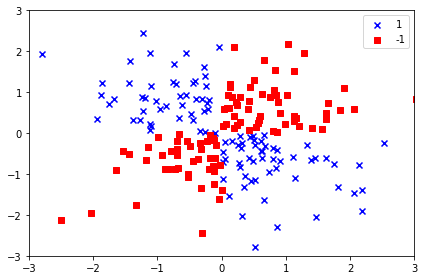

In [7]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3]) 
plt.ylim([-3, 3]) 
plt.legend(loc='best')
plt.tight_layout() 
plt.show()

Obviamente, no podremos separar bien los ejemplos de la clase positiva y negativa usando un hiperplano lineal como frontera de decisión a través de la regresión logística lineal o el modelo SVM lineal que discutimos en secciones anteriores.

La idea básica detrás de los métodos del kernel para tratar con estos datos linealmente inseparables es crear combinaciones no lineales de las características originales para proyectarlas en un espacio de mayor dimensión a través de una función de mapeo, $\phi$, donde los datos se vuelven linealmente separables. Como se muestra en la siguiente gráfica, podemos transformar un conjunto de datos bidimensional en un nuevo espacio de características tridimensional, donde las clases se vuelven separables a través de la siguiente proyección:

$$\phi(x_1, x_2) = (z_1, z_2, z_3) = (x_1,x_2,x_1^2+x_2^2)$$

Esto nos permite separar las dos clases que se muestran en el gráfico a través de un hiperplano lineal que se convierte en un límite de decisión no lineal si lo proyectamos de nuevo en el espacio de características original:

![picture](https://github.com/diplomado-bigdata-machinelearning-udea/Curso1/blob/master/s08/img/svm_nolinear_example.png?raw=true)

**Uso del kernel para encontrar hiperplanos separadores en un espacio de alta dimensión**

Para resolver un problema no lineal usando una SVM, los datos de entrenamiento son llevados a un espacio de características de mayor dimensión mediante una función de mapeo, $phi$, y se entrena un modelo SVM lineal para clasificar los datos en este nuevo espacio de características. Luego, se puede usar la misma función de mapeo, $\phi$, para transformar datos nuevos y no vistos para clasificarlos usando el modelo SVM lineal.

Sin embargo, un problema con este enfoque de mapeo es que la construcción de las nuevas características es computacionalmente muy costosa, especialmente si estamos tratando con datos de alta dimensión. En este punto es donde entra en juego el llamado truco del kernel.

Aunque no se detalló cómo resolver la tarea de programación cuadrática para entrenar una SVM, en la práctica, solo se necesita reemplazar el producto escalar $\mathbf{x}^{(𝑖)T}\mathbf{x}^{(j)}$ por $\phi(\mathbf{x}^{(𝑖)})^T\phi(\mathbf{x}^{(j)})$. Para evitar el paso tan costoso de calcular este producto escalar entre dos puntos explícitamente, definimos una función llamada kernel:

$$\mathbf{\kappa}(\mathbf{x}^{(𝑖)T},\mathbf{x}^{(j)}) = \phi(\mathbf{x}^{(𝑖)})^T\phi(\mathbf{x}^{(j)})$$

Uno de los kernels más usados es el kernel de funciones base radial (RBF - Radial Basis Functions), que pueden llamarse simplemente como kernel Gaussiano:

$$\mathbf{\kappa}(\mathbf{x}^{(𝑖)T},\mathbf{x}^{(j)}) = exp(-\gamma||\mathbf{x}^{(i)}-\mathbf{x}^{(j)}||)$$

En términos generales, el término "kernel" se puede interpretar como una función de similitud entre un par de ejemplos. El signo menos invierte la medida de la distancia en una puntuación de similitud y, debido al término exponencial, la puntuación de similitud resultante caerá en un rango entre 1 (para ejemplos exactamente similares) y 0 (para ejemplos muy diferentes).

Ahora que hemos cubierto el panorama general detrás del uso del kernel, veamos si es posible entrenar una SVM mediante un kernel que sea capaz de trazar un límite de decisión no lineal que separe bien los datos XOR. Aquí, simplemente usamos la clase SVC de scikit-learn que importamos anteriormente y reemplazamos el parámetro kernel = 'linear' con kernel = 'rbf':


In [12]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


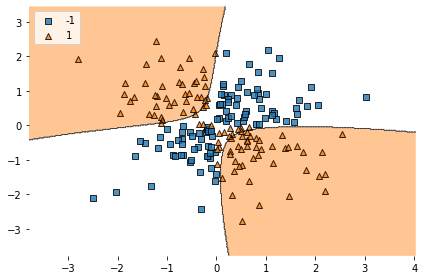

In [18]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, clf=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

El parámetro $\gamma$, que establecemos $0.1$, puede entenderse como un parámetro de corte para la esfera gaussiana. Si aumentamos el valor de $\gamma$ aumentamos la influencia o el alcance de los ejemplos de entrenamiento, lo que conduce a un límite de decisión más estricto y desigual.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


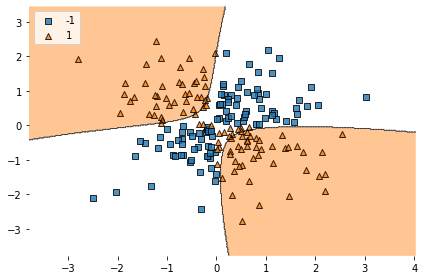

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


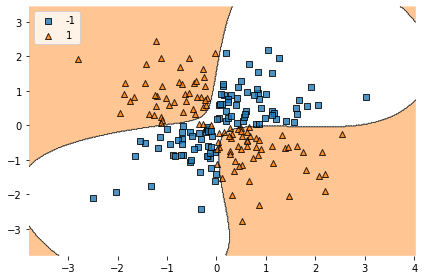

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


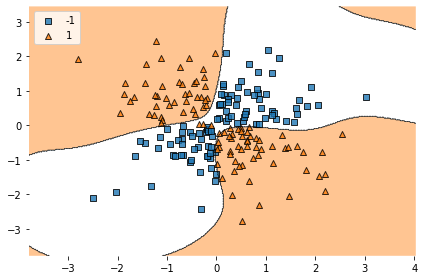

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


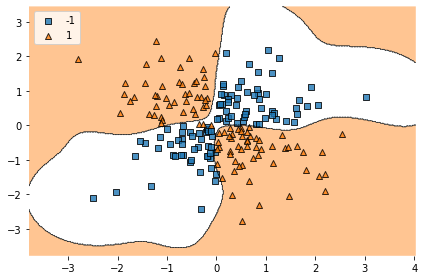

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


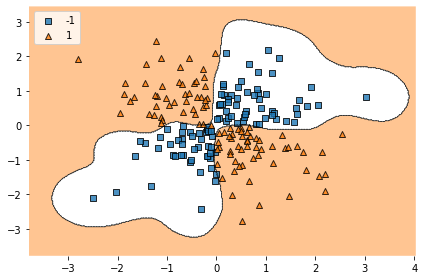

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


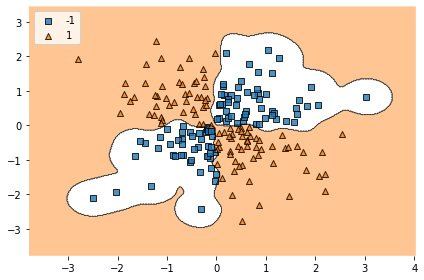

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


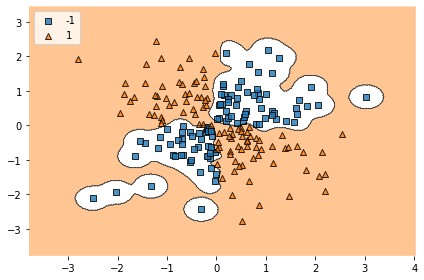

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


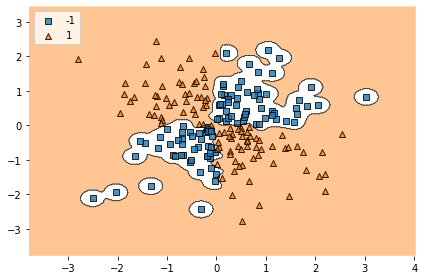

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


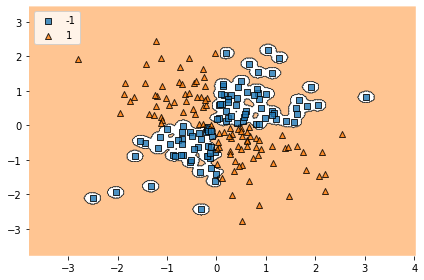

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


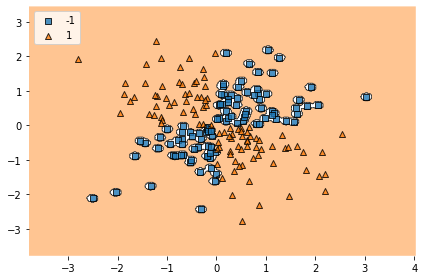

In [27]:
gamma_list = np.logspace(-1,2.5,10)

for gamma in gamma_list:
  svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=10.0)
  svm.fit(X_xor, y_xor)
  plot_decision_regions(X_xor, y_xor, clf=svm)
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()